In [1]:
import pandas as pd
import numpy as np
import time
import datetime 
import scipy.stats
import calendar
from matplotlib import pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 53000
%matplotlib inline

In [2]:
data = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/datasets/Eixample/notebook-serie-Eix_NO-19', parse_dates= ['DATA'], index_col='DATA',header=0)

In [3]:
vent_raval = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/meteo_19/meteo-vent-raval', parse_dates= ['DATA'], index_col='DATA',header=0)

In [4]:
temp_raval = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/meteo_19/meteo-temp-raval', parse_dates= ['DATA'], index_col='DATA',header=0)

In [5]:
hum_raval = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/meteo_19/meteo-hum-raval', parse_dates= ['DATA'], index_col='DATA',header=0)

In [6]:
prep_raval = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/meteo_19/meteo-prep-raval', parse_dates= ['DATA'], index_col='DATA',header=0)

In [7]:
pre_raval = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/meteo_19/meteo-pressio-raval', parse_dates= ['DATA'], index_col='DATA',header=0)

In [8]:
pre_raval = np.log(pre_raval)

In [9]:
temp_zoo = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/meteo_19/meteo-temp-zoo', parse_dates= ['DATA'], index_col='DATA',header=0)

In [10]:
hum_zoo = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/meteo_19/meteo-hum-zoo', parse_dates= ['DATA'], index_col='DATA',header=0)

In [11]:
hum_zoo = np.log(hum_zoo)

In [12]:
pre_zoo = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/meteo_19/meteo-pressio-zoo', parse_dates= ['DATA'], index_col='DATA',header=0)

In [13]:
trans_4071 = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/transit/transit-4071', parse_dates= ['DATA'], index_col='DATA',header=0)

In [14]:
trans_4071 = np.log(trans_4071)

In [15]:
trans_4095 = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/transit/transit-4095', parse_dates= ['DATA'], index_col='DATA',header=0)

In [16]:
trans_4095 = np.log(trans_4095)

In [17]:
trans_20013 = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/transit/transit-20013', parse_dates= ['DATA'], index_col='DATA',header=0)

In [18]:
trans_20013 = np.log(trans_20013)

In [19]:
vent_raval.rename(columns={'VALOR_LECTURA':'VENT_RAVAL'}, inplace=True)

In [20]:
temp_raval.rename(columns={'VALOR_LECTURA':'TEMP_RAVAL'}, inplace=True)

In [21]:
hum_raval.rename(columns={'VALOR_LECTURA':'HUM_RAVAL'}, inplace=True)

In [22]:
prep_raval.rename(columns={'VALOR_LECTURA':'PREP_RAVAL'}, inplace=True)

In [23]:
pre_raval.rename(columns={'VALOR_LECTURA':'PRE_RAVAL'}, inplace=True)

In [24]:
temp_zoo.rename(columns={'VALOR_LECTURA':'TEMP_ZOO'}, inplace=True)

In [25]:
hum_zoo.rename(columns={'VALOR_LECTURA':'HUM_ZOO'}, inplace=True)

In [26]:
pre_zoo.rename(columns={'VALOR_LECTURA':'PRE_ZOO'}, inplace=True)

In [27]:
trans_4095.rename(columns={'Valor_IMD':'4095'}, inplace=True)

In [28]:
trans_20013.rename(columns={'Valor_IMD':'20013'}, inplace=True)

In [29]:
trans_4071.rename(columns={'Valor_IMD':'4071'}, inplace=True)

In [30]:
final = pd.merge(data, temp_zoo, on = 'DATA')

In [31]:
final.head()

,H,TEMP_ZOO
DATA,,
2017-01-01,26.5,12.7
2017-01-02,253.0,16.0
2017-01-03,54.5,16.5
2017-01-04,44.0,14.4
2017-01-05,28.5,18.2


In [32]:
final = pd.merge(final, hum_zoo, on = 'DATA')

In [33]:
final = pd.merge(final, pre_zoo, on = 'DATA')

In [34]:
final = pd.merge(final, trans_4095, on= 'DATA')

In [35]:
final = pd.merge(final, trans_4071, on = 'DATA')

In [36]:
final = pd.merge(final, trans_20013, on = 'DATA')

In [37]:
final = pd.merge(final, vent_raval, on = 'DATA')

In [38]:
final = pd.merge(final, temp_raval, on = 'DATA')

In [39]:
final = pd.merge(final, hum_raval, on = 'DATA')

In [40]:
final = pd.merge(final, pre_raval, on = 'DATA')

In [41]:
final = pd.merge(final, prep_raval, on = 'DATA')

In [42]:
final.head()

,H,TEMP_ZOO,HUM_ZOO,PRE_ZOO,4095,4071,20013,VENT_RAVAL,TEMP_RAVAL,HUM_RAVAL,PRE_RAVAL,PREP_RAVAL
DATA,,,,,,,,,,,,
2017-01-01,26.5,12.7,4.521789,12.7,9.195633,10.397452,7.238497,2.6,13.1,13.1,6.931862,0.0
2017-01-02,253.0,16.0,4.574711,16.0,9.331230,10.421507,7.294377,3.0,15.7,15.7,6.921658,0.0
2017-01-03,54.5,16.5,4.369448,16.5,9.312807,10.441091,7.126891,4.0,15.6,15.6,6.923530,0.0
2017-01-04,44.0,14.4,4.488636,14.4,9.152711,10.168157,6.666957,3.2,14.9,14.9,6.920770,3.3
2017-01-05,28.5,18.2,4.369448,18.2,8.897409,9.956222,6.712956,4.0,17.5,17.5,6.924121,0.0


In [43]:
TEST_SIZE = 310

In [44]:
train, test = final[:-TEST_SIZE], final[-TEST_SIZE:]

In [45]:
train.shape

(784, 12)

In [46]:
train_1 = train.values
test_1 = test.values

In [47]:
train_1.shape

(784, 12)

In [48]:
x = np.arange(13128)
x = np.reshape(x, (1094,12))

In [49]:
x_train = x[:-TEST_SIZE]

In [50]:
x_test = x[-TEST_SIZE:]

In [51]:
final_corr = final.corr()
final_corr

,H,TEMP_ZOO,HUM_ZOO,PRE_ZOO,4095,4071,20013,VENT_RAVAL,TEMP_RAVAL,HUM_RAVAL,PRE_RAVAL,PREP_RAVAL
H,1.000000,-0.215312,0.136519,-0.215312,0.084531,0.065037,0.056199,-0.278557,-0.196868,-0.196868,0.240264,-0.072307
TEMP_ZOO,-0.215312,1.000000,0.117643,1.000000,0.012861,-0.083005,0.020609,-0.016270,0.994617,0.994617,-0.111621,0.010556
HUM_ZOO,0.136519,0.117643,1.000000,0.117643,-0.027999,-0.093746,-0.082688,-0.242971,0.116659,0.116659,-0.083629,0.210906
PRE_ZOO,-0.215312,1.000000,0.117643,1.000000,0.012861,-0.083005,0.020609,-0.016270,0.994617,0.994617,-0.111621,0.010556
4095,0.084531,0.012861,-0.027999,0.012861,1.000000,0.423158,0.260414,0.008020,0.013095,0.013095,0.003887,0.009722
4071,0.065037,-0.083005,-0.093746,-0.083005,0.423158,1.000000,0.576705,0.048169,-0.076729,-0.076729,0.057574,-0.031095
20013,0.056199,0.020609,-0.082688,0.020609,0.260414,0.576705,1.000000,-0.054993,0.028537,0.028537,0.144501,-0.023631
VENT_RAVAL,-0.278557,-0.016270,-0.242971,-0.016270,0.008020,0.048169,-0.054993,1.000000,-0.020885,-0.020885,-0.347002,0.104362
TEMP_RAVAL,-0.196868,0.994617,0.116659,0.994617,0.013095,-0.076729,0.028537,-0.020885,1.000000,1.000000,-0.110889,0.008813
HUM_RAVAL,-0.196868,0.994617,0.116659,0.994617,0.013095,-0.076729,0.028537,-0.020885,1.000000,1.000000,-0.110889,0.008813


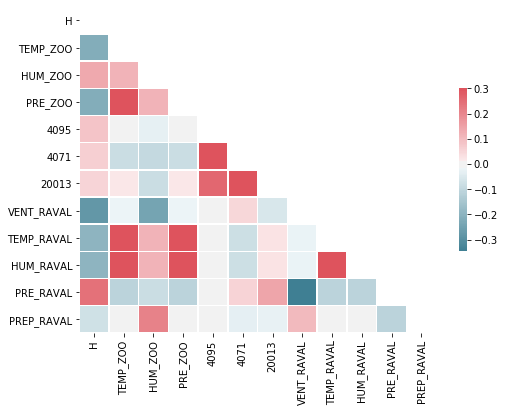

In [52]:
mask = np.zeros_like(final_corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8,6))

cmap = sns.diverging_palette(220, 10, as_cmap= True)

sns.heatmap(final_corr, mask= mask, cmap= cmap, vmax= .3, center= 0, square= False, linewidths= .5, cbar_kws= {'shrink': .5})

In [53]:
data.head()

,H
DATA,
2017-01-01,26.5
2017-01-02,253.0
2017-01-03,54.5
2017-01-04,44.0
2017-01-05,28.5


In [54]:
prueba = pd.merge(data, vent_raval, on = 'DATA')

In [55]:
prueba = pd.merge(prueba, temp_raval, on = 'DATA')

In [56]:
prueba = pd.merge(prueba, hum_raval, on = 'DATA')

In [57]:
prueba = pd.merge(prueba, pre_raval, on = 'DATA')

In [58]:
prueba = pd.merge(prueba, prep_raval, on = 'DATA')

In [59]:
prueba = pd.merge(prueba, temp_zoo, on = 'DATA')

In [60]:
prueba = pd.merge(prueba, hum_zoo, on = 'DATA')

In [61]:
prueba = pd.merge(prueba, pre_zoo, on = 'DATA')

In [62]:
prueba = pd.merge(prueba, trans_4095, on= 'DATA')

In [63]:
prueba = pd.merge(prueba, trans_4071, on = 'DATA')

In [64]:
prueba = pd.merge(prueba, trans_20013, on = 'DATA')

# ARIMA / SARIMA

In [65]:
ultimo_fecha = max(data.index)
ultimo_dia_mes = calendar.monthrange(ultimo_fecha.year, ultimo_fecha.month)[1]
inicio = min(data.index).replace(day=1)
fin = ultimo_fecha.replace(day=ultimo_dia_mes)

index =pd.DatetimeIndex(start=inicio, end=fin, freq= '24h')
data = data.reindex(index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [66]:
data.isnull().sum()

H    1
dtype: int64

In [67]:
mean = data['H'].astype(float).mean(skipna=True)

In [68]:
data['H'].replace(to_replace=np.NaN, value= mean, inplace=True)

In [69]:
data.isnull().sum()

H    0
dtype: int64

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


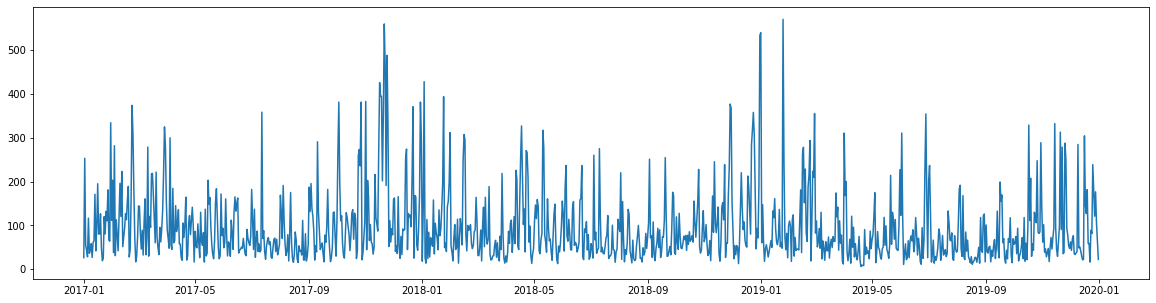

In [70]:
plt.figure(figsize=(20,5))
plt.plot(data)

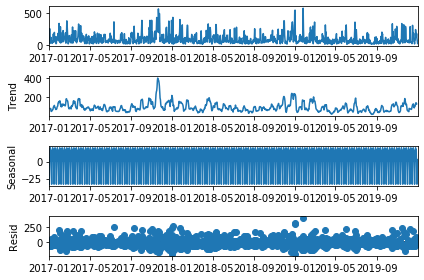

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)
fig= decomposition.plot()

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


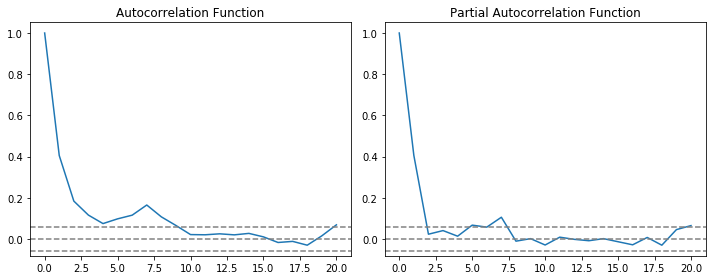

In [72]:
plt.figure(figsize=(10,4))

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags= 20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle= '--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle= '--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [73]:
from statsmodels.tsa.arima_model import ARIMA

model_conf = ARIMA(data, order= (2,1, 3))
model_fit = model_conf.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.H   No. Observations:                 1094
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -6278.410
Method:                       css-mle   S.D. of innovations             75.115
Date:                Wed, 22 Jul 2020   AIC                          12570.821
Time:                        11:42:27   BIC                          12605.804
Sample:                    01-02-2017   HQIC                         12584.059
                         - 12-31-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0033      0.106     -0.031      0.975      -0.210       0.204
ar.L1.D.H     -0.4814      0.131     -3.669      0.000      -0.739      -0.224
ar.L2.D.H      0.3271      0.078      4.197      0.000       0.174       0.480
ma.L1.D.H     -0.1244      0.134     -0.926      0.355      -0.388       0.139
ma.L2.D.H     -0.8659      0.064    -13.574      0.000      -0.991      -0.741
ma.L3.D.H      0.0423      0.090      0.472      0.637      -0.133       0.218
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1611           +0.0000j            1.1611            0.5000
AR.2            2.6328           +0.0000j            2.6328            0.0000
MA.1            1.0297           +0.0000j            1.0297            0.0000
MA.2           -1.1168           +0.0000j            1.1168            0.5000
MA.3           20.5670           +0.0000j           20.5670            0.0000
-----------------------------------------------------------------------------
"""

In [74]:
model_conf = ARIMA(data[:'2019-12-31'], order=(2,1,3))
model_fit= model_conf.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.H   No. Observations:                 1094
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -6278.410
Method:                       css-mle   S.D. of innovations             75.115
Date:                Wed, 22 Jul 2020   AIC                          12570.821
Time:                        11:42:28   BIC                          12605.804
Sample:                    01-02-2017   HQIC                         12584.059
                         - 12-31-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0033      0.106     -0.031      0.975      -0.210       0.204
ar.L1.D.H     -0.4814      0.131     -3.669      0.000      -0.739      -0.224
ar.L2.D.H      0.3271      0.078      4.197      0.000       0.174       0.480
ma.L1.D.H     -0.1244      0.134     -0.926      0.355      -0.388       0.139
ma.L2.D.H     -0.8659      0.064    -13.574      0.000      -0.991      -0.741
ma.L3.D.H      0.0423      0.090      0.472      0.637      -0.133       0.218
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1611           +0.0000j            1.1611            0.5000
AR.2            2.6328           +0.0000j            2.6328            0.0000
MA.1            1.0297           +0.0000j            1.0297            0.0000
MA.2           -1.1168           +0.0000j            1.1168            0.5000
MA.3           20.5670           +0.0000j           20.5670            0.0000
-----------------------------------------------------------------------------
"""

In [75]:
model_conf = ARIMA(data[:'2019-12-31'], order =(2,1,2), freq='D')
model_fit = model_conf.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.H   No. Observations:                 1094
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6278.521
Method:                       css-mle   S.D. of innovations             75.123
Date:                Wed, 22 Jul 2020   AIC                          12569.042
Time:                        11:42:29   BIC                          12599.028
Sample:                    01-02-2017   HQIC                         12580.389
                         - 12-31-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025      0.108     -0.023      0.982      -0.214       0.209
ar.L1.D.H     -0.5338      0.066     -8.118      0.000      -0.663      -0.405
ar.L2.D.H      0.2955      0.041      7.197      0.000       0.215       0.376
ma.L1.D.H     -0.0683      0.057     -1.206      0.228      -0.179       0.043
ma.L2.D.H     -0.8747      0.055    -15.781      0.000      -0.983      -0.766
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1461           +0.0000j            1.1461            0.5000
AR.2            2.9529           +0.0000j            2.9529            0.0000
MA.1            1.0309           +0.0000j            1.0309            0.0000
MA.2           -1.1090           +0.0000j            1.1090            0.5000
-----------------------------------------------------------------------------
"""

In [76]:
residuals = pd.DataFrame(model_fit.resid)

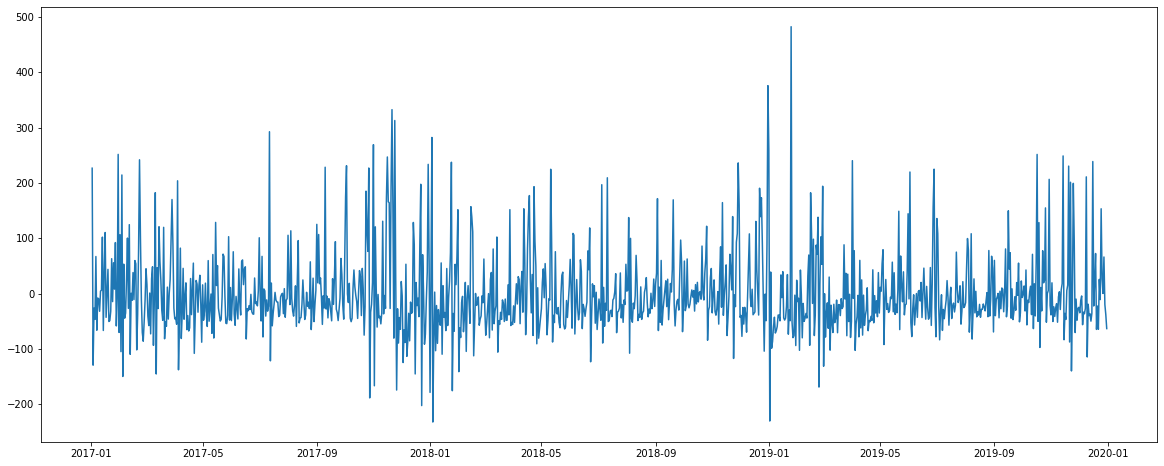

In [77]:
plt.figure(figsize=(20,8))
plt.plot(residuals)

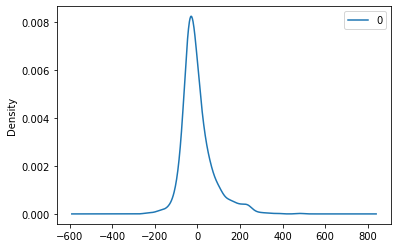

In [78]:
residuals.plot(kind='kde')

In [79]:
ini_forecast = pd.Timestamp('2019-01-01', freq='D')
ndays= 365

end_forecast = ini_forecast + ndays -1

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  after removing the cwd from sys.path.


In [80]:
model_conf = ARIMA(data[:ini_forecast-1], order=(2,1,2), freq='D')
model_fit = model_conf.fit()
forecast = model_fit.forecast(ndays)[0]
forecast = pd.DataFrame(forecast, columns=['forecast'],
                       index=data[ini_forecast:end_forecast].index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  """Entry point for launching an IPython kernel.


In [81]:
forecast_daily = []
for d in range (ndays):
    ini_test = ini_forecast + d
    modelconf_day =ARIMA(data[:ini_test - 1], order = (2,1,1), freq='D')
    modelfit_day = modelconf_day.fit()
    forecast_daily.append(modelfit_day.forecast(1)[0])
    
forecast_daily = pd.DataFrame(forecast_daily, columns=['forecast'],
                             index=data[ini_forecast:end_forecast].index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  after removing the cwd from sys.path.
/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  


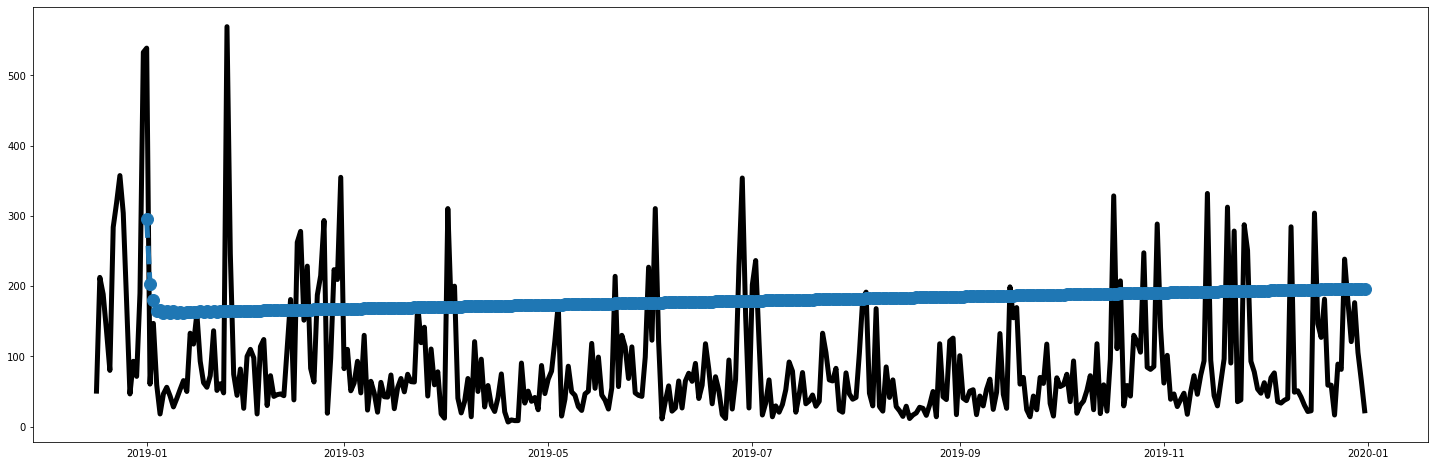

In [82]:
plt.figure(figsize=(25, 8))
plt.plot(data[ini_forecast-15:end_forecast], linewidth=5, color='black')
plt.plot(forecast, linewidth=5, linestyle='--', markersize=12, marker='o')

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  


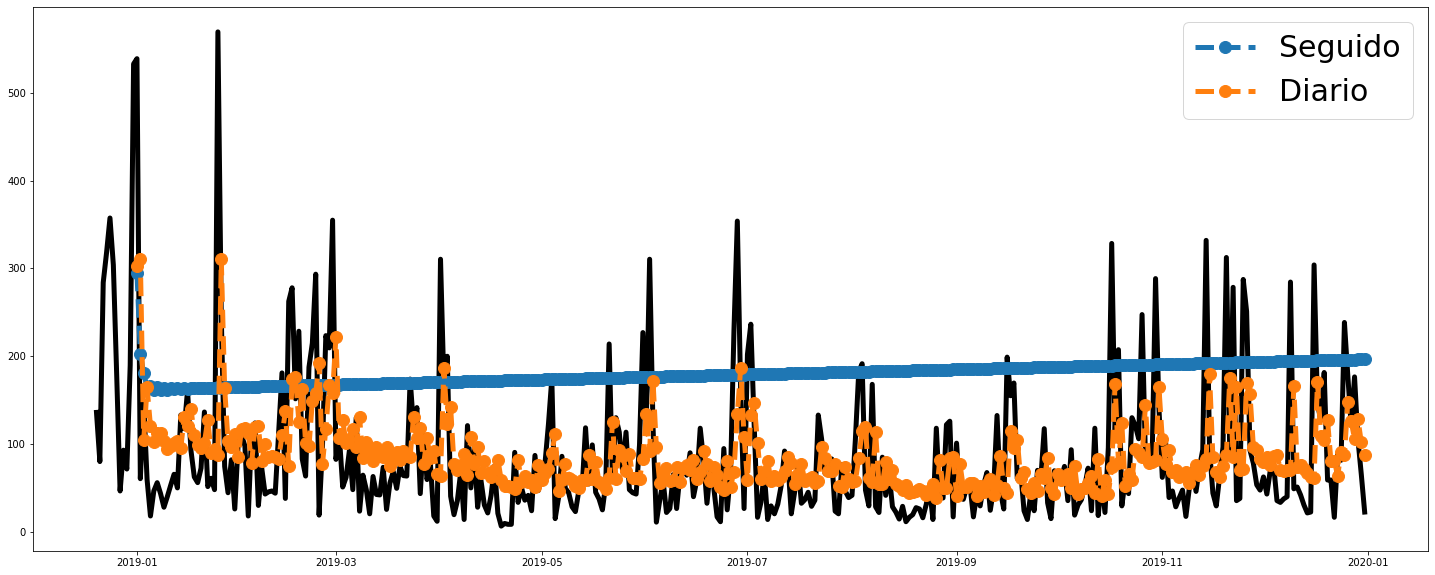

In [83]:
plt.figure(figsize=(25, 10))
plt.plot(data[ini_forecast-12:end_forecast], linewidth=5, color='black')
plt.plot(forecast, linewidth=5, linestyle='--', markersize=12, marker='o', label='Seguido')
plt.plot(forecast_daily, linewidth=5, linestyle='--', markersize= 12, marker='o', label='Diario')
plt.legend(prop={'size':30})

# REGRESIÓN LINEAL

In [84]:
data.shape

(1095, 1)

In [85]:
train_data, test_data = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]

In [86]:
x_train_data = np.array(range(train_data.shape[0]))
x_test_data = np.array(range(train_data.shape[0], data.shape[0]))

In [87]:
x_test_data.shape

(310,)

In [88]:
x_train_data.shape

(785,)

In [89]:
train_data.shape

(785, 1)

In [90]:
test_data.shape

(310, 1)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
y_pred_mean = [train_data.values[-12:].mean()] * 310

In [93]:
train_data = train_data.values

In [94]:
lr_model = LinearRegression()
lr_model.fit(x_train_data.reshape(-1,1), train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
y_pred_lr = lr_model.predict(x_test_data.reshape(-1,1))

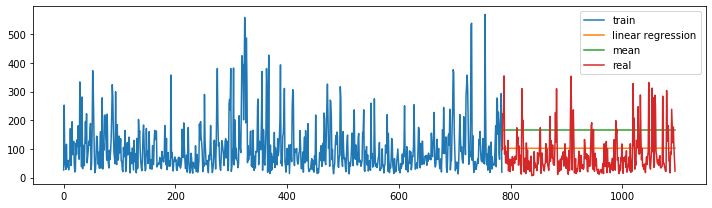

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(10,3))
ax.plot(x_train_data, train_data, label='train')
ax.plot(x_test_data, y_pred_lr, label ='linear regression')
ax.plot(x_test_data, y_pred_mean, label='mean')
ax.plot(x_test_data, test_data, label ='real')
plt.legend()
plt.tight_layout()

In [97]:
def mae(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / y_true.size

In [98]:
print('MAE in a mean model:', mae (test_data.values, y_pred_mean))

MAE in a mean model: 32627.16544789762


In [99]:
print('MAE in linear regression model:', mae(test_data.values, y_pred_lr))

MAE in linear regression model: 60.19547298922041


In [100]:
def mse(y_true, y_pred):
    return((y_true - y_pred)** 2).sum() / y_true.size

In [101]:
print('MSE in mean model:', mse(test_data.values, y_pred_mean))
print('MSE in linear regression model:', mse(test_data.values, y_pred_lr))

MSE in mean model: 3910422.144146316
MSE in linear regression model: 5338.5525011837335


In [102]:
def rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred)** 2).sum() / y_true.size)

In [103]:
print('RMSE in mean model:', rmse(test_data.values, y_pred_mean))
print('RMSE in linear regression model:', rmse(test_data.values, y_pred_lr))

RMSE in mean model: 1977.47873418308
RMSE in linear regression model: 73.06539879576196


In [104]:
def mape (y_true, y_pred):
    return 2 * np.abs((y_true - y_pred) / y_true).sum() / y_true.size

In [105]:
print('MAPE in mean model:', mape(test_data.values, y_pred_mean))
print('MAPE in linear regression model:', mape(test_data.values, y_pred_lr))

MAPE in mean model: 1892.1248040696282
MAPE in linear regression model: 3.227686992415452


In [106]:
lrw_model = LinearRegression()
lrw_model.fit(x_train_data.reshape(-1,1), train_data,
             sample_weight= [i**5 for i in x_train_data])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
y_pred_lr_w = lrw_model.predict(x_test_data.reshape(-1, 1))

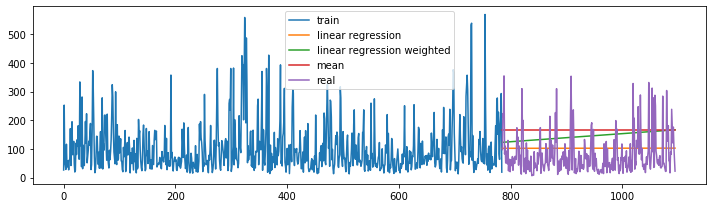

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(x_train_data, train_data, label='train')
ax.plot(x_test_data, y_pred_lr, label='linear regression')
ax.plot(x_test_data, y_pred_lr_w, label='linear regression weighted')
ax.plot(x_test_data, y_pred_mean, label='mean')
ax.plot(x_test_data, test_data, label='real')
plt.legend()
plt.tight_layout()

In [109]:
print('MAE in mean model: ', mae(test_data.values, y_pred_mean))
print('MAE in linear regression model: ', mae(test_data.values, y_pred_lr))
print('MAE in weighted linear regression model: ', mae(test_data.values, y_pred_lr_w))

print('RMSE in mean model: ', rmse(test_data.values, y_pred_mean))
print('RMSE in linear regression model: ', rmse(test_data.values, y_pred_lr))
print('RMSE in weighted linear regression model: ', rmse(test_data.values, y_pred_lr_w))

MAE in mean model:  32627.16544789762
MAE in linear regression model:  60.19547298922041
MAE in weighted linear regression model:  88.12800814724044
RMSE in mean model:  1977.47873418308
RMSE in linear regression model:  73.06539879576196
RMSE in weighted linear regression model:  96.136927373686


In [110]:
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), train_1.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

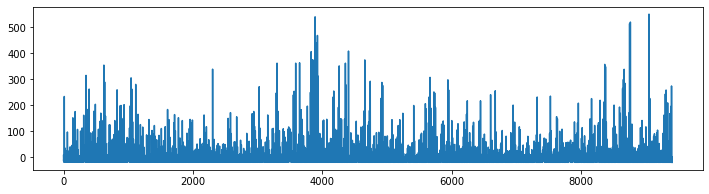

In [111]:
train_log_trend = (train_1.reshape(-1,1) - model.predict(x_train.reshape(-1, 1))).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(x_train.reshape(-1,1), train_log_trend.reshape(-1,1))

In [112]:
type(train_log_trend)

numpy.ndarray

In [113]:
train_log_trend = pd.DataFrame(train_log_trend)

In [114]:
train_log_trend.replace(to_replace= -np.inf, value= 0.479792, inplace= True)

In [115]:
train_log_trend.head()

,0
0,7.536823
1,-6.263194
2,-14.441422
3,-6.263228
4,-9.767612


# REGRESIÓN POLINOMICA

In [116]:
prueba.shape

(1094, 12)

In [117]:
TEST_SIZE = 310

In [118]:
x_prueba = np.arange(13128)
x_prueba = np.reshape(x_prueba, (1094,12))

In [119]:
x_train_prueba =  x_prueba[:-TEST_SIZE]

In [120]:
x_test_prueba = x_prueba[-TEST_SIZE:]

In [121]:
prueba_train, prueba_test = prueba[:-TEST_SIZE], prueba[-TEST_SIZE:]

In [122]:
prueba_train_1 = prueba_train.values

In [123]:
prueba_test_1 = prueba_test.values

In [124]:
prueba = prueba.reset_index()

In [125]:
prueba.head()

,DATA,H,VENT_RAVAL,TEMP_RAVAL,HUM_RAVAL,PRE_RAVAL,PREP_RAVAL,TEMP_ZOO,HUM_ZOO,PRE_ZOO,4095,4071,20013
0,2017-01-01,26.5,2.6,13.1,13.1,6.931862,0.0,12.7,4.521789,12.7,9.195633,10.397452,7.238497
1,2017-01-02,253.0,3.0,15.7,15.7,6.921658,0.0,16.0,4.574711,16.0,9.331230,10.421507,7.294377
2,2017-01-03,54.5,4.0,15.6,15.6,6.923530,0.0,16.5,4.369448,16.5,9.312807,10.441091,7.126891
3,2017-01-04,44.0,3.2,14.9,14.9,6.920770,3.3,14.4,4.488636,14.4,9.152711,10.168157,6.666957
4,2017-01-05,28.5,4.0,17.5,17.5,6.924121,0.0,18.2,4.369448,18.2,8.897409,9.956222,6.712956


In [126]:
prueba.dtypes

DATA          datetime64[ns]
H                    float64
VENT_RAVAL           float64
TEMP_RAVAL           float64
HUM_RAVAL            float64
PRE_RAVAL            float64
PREP_RAVAL           float64
TEMP_ZOO             float64
HUM_ZOO              float64
PRE_ZOO              float64
4095                 float64
4071                 float64
20013                float64
dtype: object

In [127]:
prueba.shape

(1094, 13)

In [128]:
prueba['DATA'] = prueba['DATA'].astype(int)

In [129]:
prueba['DATA'] = np.arange(1094)

In [130]:
prueba.head()

,DATA,H,VENT_RAVAL,TEMP_RAVAL,HUM_RAVAL,PRE_RAVAL,PREP_RAVAL,TEMP_ZOO,HUM_ZOO,PRE_ZOO,4095,4071,20013
0,0,26.5,2.6,13.1,13.1,6.931862,0.0,12.7,4.521789,12.7,9.195633,10.397452,7.238497
1,1,253.0,3.0,15.7,15.7,6.921658,0.0,16.0,4.574711,16.0,9.331230,10.421507,7.294377
2,2,54.5,4.0,15.6,15.6,6.923530,0.0,16.5,4.369448,16.5,9.312807,10.441091,7.126891
3,3,44.0,3.2,14.9,14.9,6.920770,3.3,14.4,4.488636,14.4,9.152711,10.168157,6.666957
4,4,28.5,4.0,17.5,17.5,6.924121,0.0,18.2,4.369448,18.2,8.897409,9.956222,6.712956


In [131]:
prueba.set_index('DATA', inplace = True)

In [132]:
prueba.dtypes

H             float64
VENT_RAVAL    float64
TEMP_RAVAL    float64
HUM_RAVAL     float64
PRE_RAVAL     float64
PREP_RAVAL    float64
TEMP_ZOO      float64
HUM_ZOO       float64
PRE_ZOO       float64
4095          float64
4071          float64
20013         float64
dtype: object

In [133]:
prueba.head()

,H,VENT_RAVAL,TEMP_RAVAL,HUM_RAVAL,PRE_RAVAL,PREP_RAVAL,TEMP_ZOO,HUM_ZOO,PRE_ZOO,4095,4071,20013
DATA,,,,,,,,,,,,
0,26.5,2.6,13.1,13.1,6.931862,0.0,12.7,4.521789,12.7,9.195633,10.397452,7.238497
1,253.0,3.0,15.7,15.7,6.921658,0.0,16.0,4.574711,16.0,9.331230,10.421507,7.294377
2,54.5,4.0,15.6,15.6,6.923530,0.0,16.5,4.369448,16.5,9.312807,10.441091,7.126891
3,44.0,3.2,14.9,14.9,6.920770,3.3,14.4,4.488636,14.4,9.152711,10.168157,6.666957
4,28.5,4.0,17.5,17.5,6.924121,0.0,18.2,4.369448,18.2,8.897409,9.956222,6.712956


In [134]:
from sklearn.preprocessing import PolynomialFeatures

In [135]:
poli_reg = PolynomialFeatures(degree = 3)

In [136]:
x_train_poli = poli_reg.fit_transform(x_train_prueba)

In [137]:
x_test_poli = poli_reg.fit_transform(x_test_prueba)

In [138]:
pr = LinearRegression()

In [139]:
pr.fit(x_train_poli, prueba_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
y_pred_pr = pr.predict(x_test_poli)

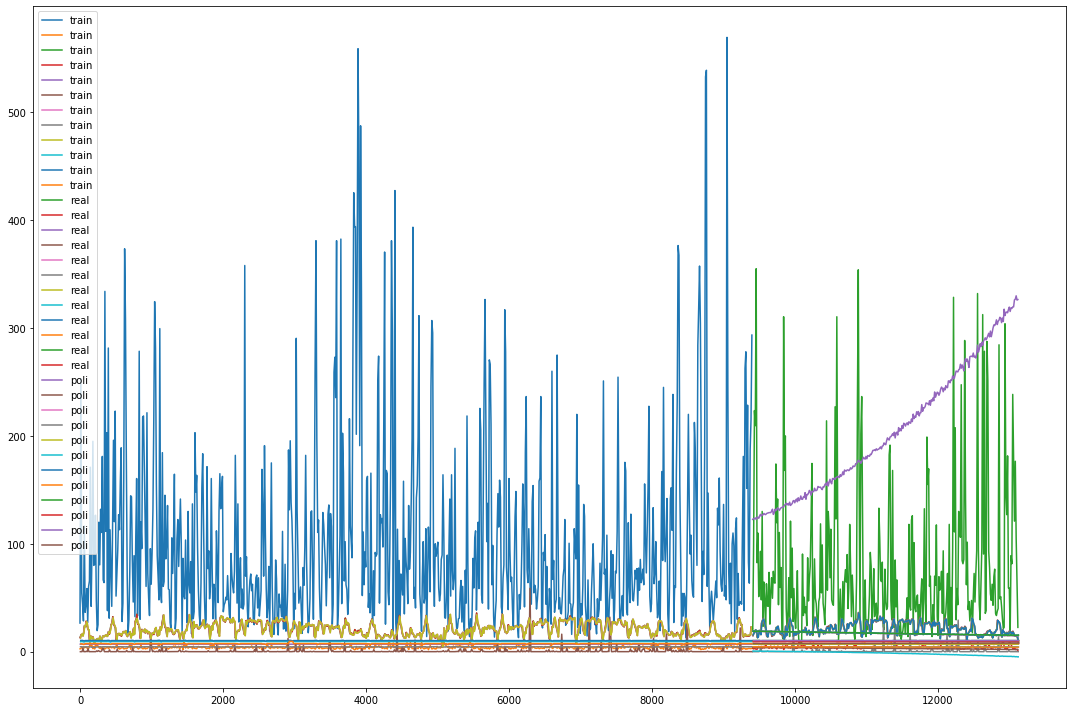

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(x_train_prueba, prueba_train_1, label='train')
ax.plot(x_test_prueba, prueba_test_1, label='real')
ax.plot(x_test_prueba, y_pred_pr, label='poli')
plt.legend()
plt.tight_layout()

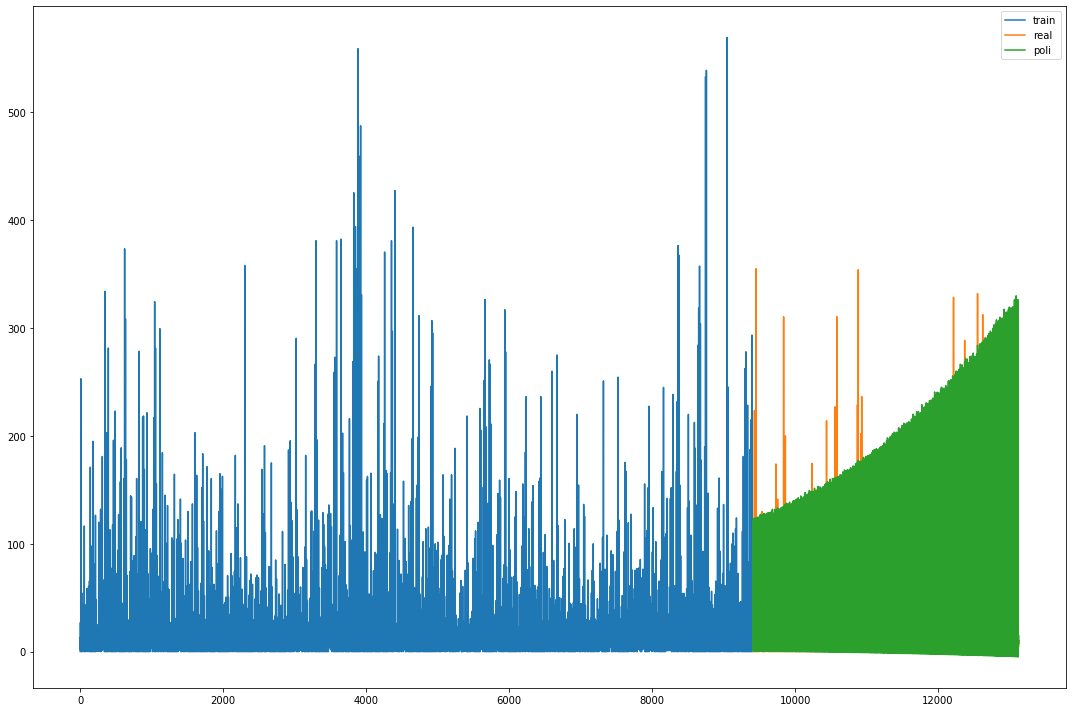

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(x_train_prueba.reshape(-1,1), prueba_train_1.reshape(-1,1), label='train')
ax.plot(x_test_prueba.reshape(-1,1), prueba_test_1.reshape(-1,1), label='real')
ax.plot(x_test_prueba.reshape(-1,1), y_pred_pr.reshape(-1,1), label='poli')
plt.legend()
plt.tight_layout()

# ARBRES

In [143]:
from sklearn.tree import DecisionTreeRegressor

In [144]:
tree_model = DecisionTreeRegressor()

In [145]:
tree_model.fit(x_train.reshape(-1,1), train_1.reshape(-1,1))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [146]:
y_pred_tree = tree_model.predict(x_test.reshape(-1,1))

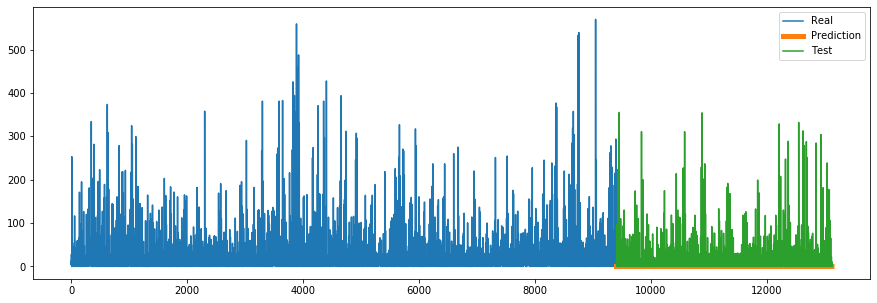

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_tree, label='Prediction', linewidth =5)
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label = 'Test')
ax.legend()

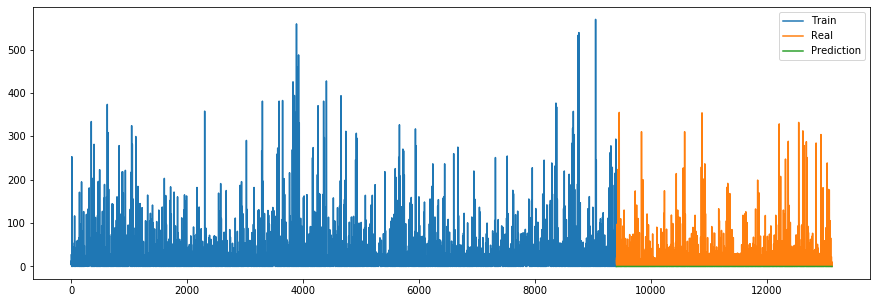

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Train')
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_tree, label='Prediction')
ax.legend()

In [149]:
tree_model = DecisionTreeRegressor(max_depth=7)

In [150]:
tree_model.fit(x_train.reshape(-1,1), train_1.reshape(-1,1))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [151]:
y_pred_tree = tree_model.predict(x_train.reshape(-1,1))

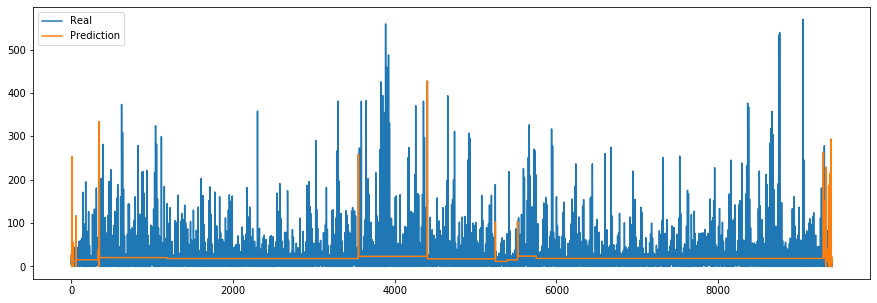

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Real')
ax.plot(x_train.reshape(-1,1), y_pred_tree, label='Prediction')
ax.legend()

# RANDOM FOREST

In [153]:
from sklearn import ensemble

In [154]:
rf_model = ensemble.RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(x_train.reshape(-1,1), train_1.reshape(-1,1))
y_pred_rf = rf_model.predict(x_test.reshape(-1,1))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


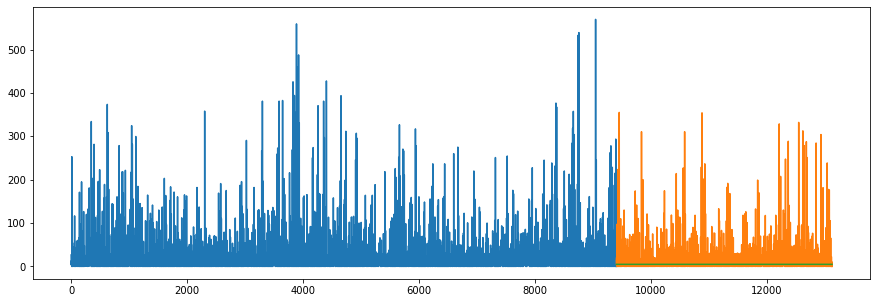

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_rf, label='Prediction')

In [156]:
x_train.reshape(-1,1).shape

(9408, 1)

In [157]:
x_test.reshape(-1,1).shape

(3720, 1)

In [158]:
x_train_month = np.hstack((x_train.reshape(-1,1), np.array(list(range(147)) * 64).reshape(-1,1)))
x_test_month = np.hstack((x_test.reshape(-1,1), np.array(list(range(93)) * 40).reshape(-1,1)))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


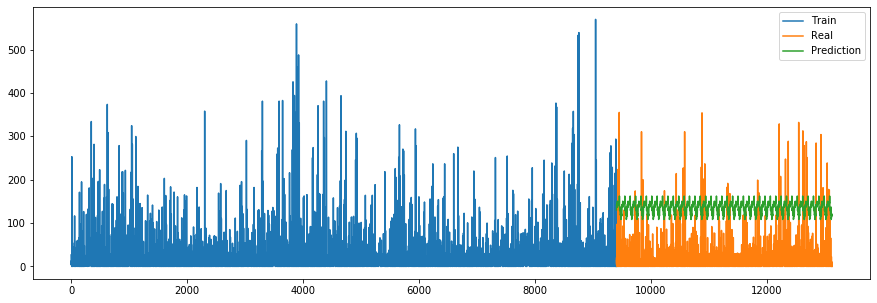

In [159]:
rf_model = ensemble.RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(x_train_month, train_1.reshape(-1,1))
y_pred_rf = rf_model.predict(x_test_month)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Train')
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_rf, label='Prediction')
ax.legend()

In [160]:
x_train_month_year = np.hstack((x_train_month, np.repeat(list(range(147)), 64).reshape(-1,1)))
x_test_month_year = np.hstack((x_test_month, np.repeat(list(range(1,94)), 40).reshape(-1,1)))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


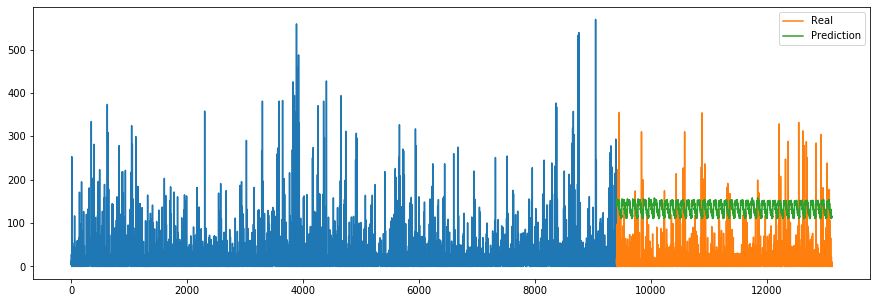

In [161]:
rf_model = ensemble.RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(x_train_month_year, train_1.reshape(-1,1))
y_pred_rf = rf_model.predict(x_test_month_year)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_rf, label='Prediction')
ax.legend()

# XGBOOST

In [162]:
from xgboost import XGBRegressor, plot_tree, plot_importance

In [163]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=4)
xgb_model.fit(x_train_month_year, train_1.reshape(-1,1))
y_pred_xgb = xgb_model.predict(x_test_month_year)

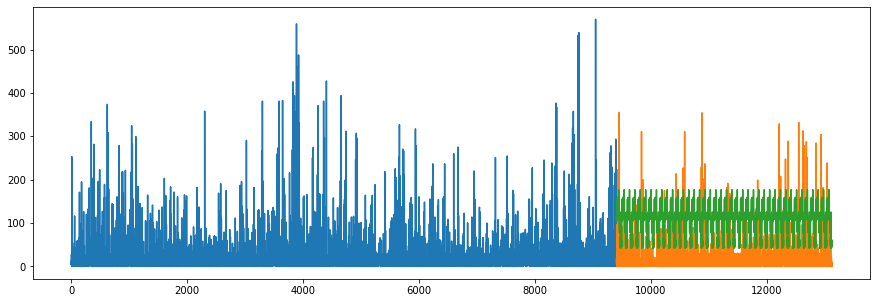

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_xgb, label='Prediction')

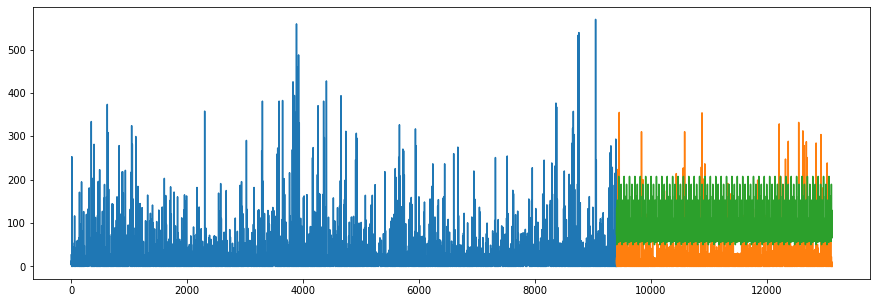

In [165]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=1)
xgb_model.fit(x_train_month_year, train_1.reshape(-1,1))
y_pred_xgb = xgb_model.predict(x_test_month_year)



fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_xgb, label='Prediction')

In [166]:
x_train_month_year_2ylag = np.hstack(((train_1.reshape(-1,1)[24:] / train_1.reshape(-1,1)[:-24])[:-24],
                                      (train_1.reshape(-1,1)[24:] - train_1.reshape(-1,1)[:-24])[:-24],
                                      x_train_month_year[48:,:]))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [167]:
x_test_month_year_2ylag = np.hstack(((train_1[100:].reshape(-1,1) / train_1[:-100].reshape(-1,1))[:3720],
                                     (train_1[100:].reshape(-1,1) - train_1[:-100].reshape(-1,1))[:3720],
                                     x_test_month_year))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


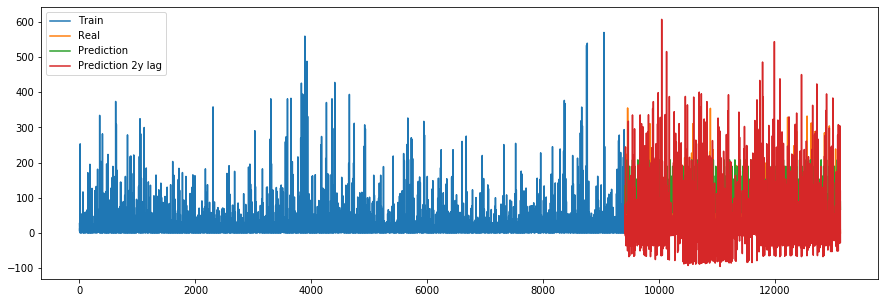

In [168]:
xgb_model = XGBRegressor(n_estimators=300, max_depth=3, learning_rate= 1.4)
xgb_model.fit(x_train_month_year_2ylag, train_1.reshape(-1,1)[48:])
y_pred_xgb_2ylag = xgb_model.predict(x_test_month_year_2ylag)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Train')
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_xgb, label='Prediction')
ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag, label='Prediction 2y lag')
ax.legend()

In [169]:
print(xgb_model.score(x_train_month_year_2ylag, train_1.reshape(-1,1)[48:]))

0.9868995208938829


<Figure size 432x288 with 0 Axes>

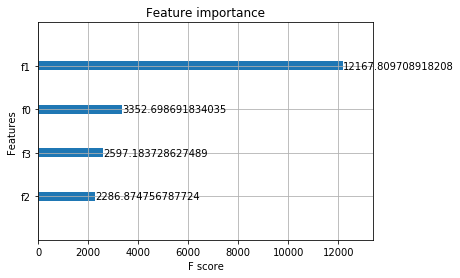

In [170]:
plt.figure()
plot_importance(xgb_model, importance_type='gain')

In [171]:
train_log_trend = train_log_trend.values

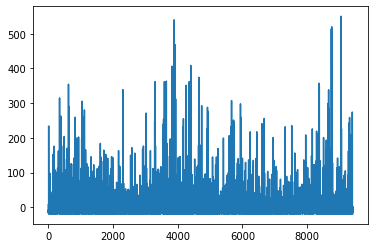

In [172]:
fig, ax = plt.subplots(1, 1)
ax.plot(x_train.reshape(-1,1), train_log_trend.reshape(-1,1))

In [173]:
xgb_model = XGBRegressor(n_estimators=500, max_depth=3, learning_rate=1.5)
xgb_model.fit(x_train_month_year_2ylag, train_log_trend.reshape(-1,1)[48:])
y_pred_xgb_2ylag_wotrend = xgb_model.predict(x_test_month_year_2ylag)

In [174]:
xgb_model.score(x_train_month_year_2ylag, train_log_trend.reshape(-1,1)[48:])

0.9948051314269479

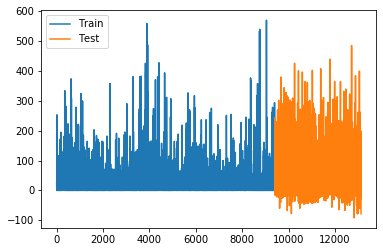

In [175]:
fig, ax = plt.subplots(1, 1)
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label ='Train')
ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag_wotrend, label ='Test')
ax.legend()

In [176]:
y_pred_xgb_2ylag_desc = (y_pred_xgb_2ylag_wotrend + model.predict(x_test.reshape(-1, 1)).squeeze())

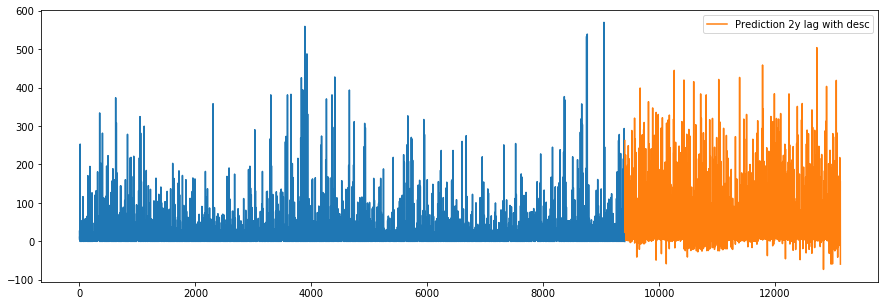

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
#ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')

#ax.plot(x_test.reshape(-1,1), y_pred_xgb, label='Prediction seasonality')
#ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag, label='Prediction 2y lag')
ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag_desc, label='Prediction 2y lag with desc')
ax.legend()

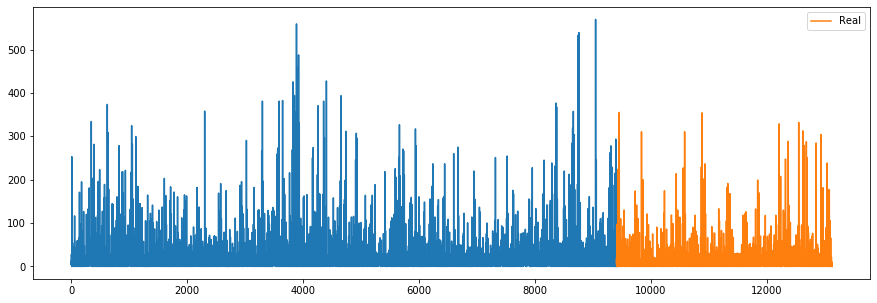

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.legend()

In [179]:
xgb_model.score(x_test_month_year_2ylag, y_pred_xgb_2ylag_desc)

0.9015579347934097